In [17]:
import pandas as pd
from matplotlib import pyplot
from numpy import sqrt
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [5]:
cocacola = pd.read_excel('E:/DataScience/Assignments/Forecasting/CocaCola_Sales_Rawdata.xlsx', header=0, index_col=0, parse_dates=True)

In [6]:
cocacola

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


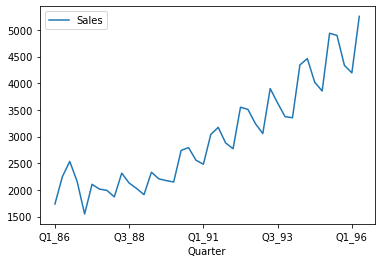

In [7]:
cocacola.plot()
pyplot.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019EA93F43D0>]],
      dtype=object)

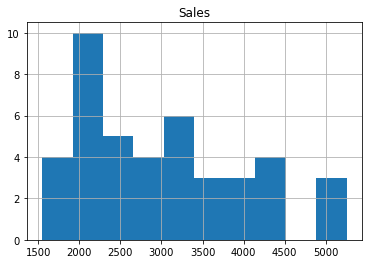

In [8]:
cocacola.hist()

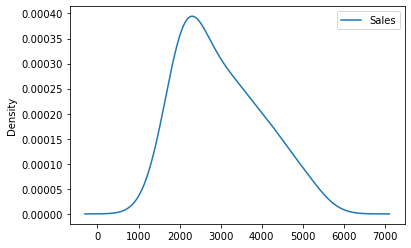

In [9]:
cocacola.plot(kind='kde')

In [11]:
split_point = len(cocacola) - 10
dataset, validation = cocacola[0:split_point], cocacola[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 32, Validation 10


In [12]:
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

In [13]:
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [16]:
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)

    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=2173.968, Expected=2148.278
>Predicted=2148.278, Expected=2739.308
>Predicted=2739.308, Expected=2792.754
>Predicted=2792.754, Expected=2556.010
>Predicted=2556.010, Expected=2480.974
>Predicted=2480.974, Expected=3039.523
>Predicted=3039.523, Expected=3172.116
>Predicted=3172.116, Expected=2879.001
>Predicted=2879.001, Expected=2772.000
>Predicted=2772.000, Expected=3550.000
>Predicted=3550.000, Expected=3508.000
>Predicted=3508.000, Expected=3243.860
>Predicted=3243.860, Expected=3056.000
>Predicted=3056.000, Expected=3899.000
>Predicted=3899.000, Expected=3629.000
>Predicted=3629.000, Expected=3373.000
RMSE: 387.510


In [18]:
def evaluate_arima_model(X, arima_order):

    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)

        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [19]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [20]:
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

In [21]:
X = train.values
X = X.astype('float32')

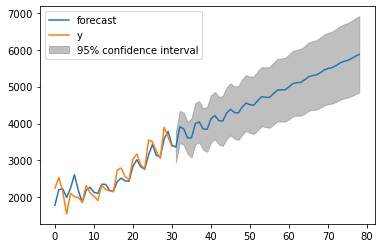

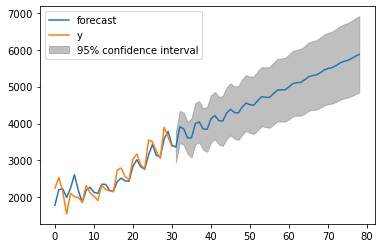

In [22]:
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

In [23]:
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

631.6620680544806

In [101]:
model = ARIMA(X, order=(0,0,3))
model_fit = model.fit()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


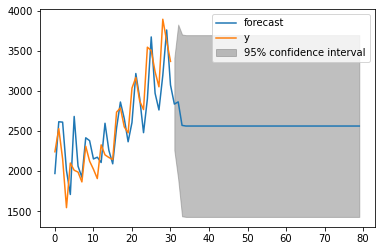

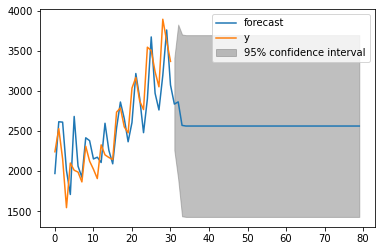

In [102]:
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,80)

In [103]:
forecast

array([2839.82312864, 2867.86026453, 2574.20458415, 2566.35284419,
       2566.35284419, 2566.35284419, 2566.35284419, 2566.35284419,
       2566.35284419, 2566.35284419])